In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from iclr import *

%matplotlib inline

sns.set_style("whitegrid")

# Color and Marker code

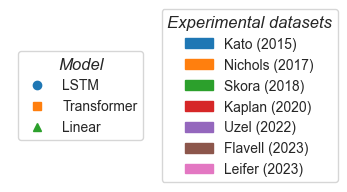

In [3]:
leg_code = legend_code()

# Model Parameters

In [4]:
from models._main import get_model
from omegaconf import OmegaConf

model_config = OmegaConf.load('/home/lrvnc/Projects/worm-graph/configs/submodule/model.yaml')

model_config.model.use_this_pretrained_model = None
model = get_model(model_config.model)
print_parameters(model, verbose=True)

+-----------------------------------------+------------+-----------+
|                  Module                 | Parameters | Trainable |
+-----------------------------------------+------------+-----------+
|          input_hidden.1.weight          |   87580    |    True   |
|           input_hidden.1.bias           |    290     |    True   |
|  hidden_hidden.self_attn.in_proj_weight |   252300   |    True   |
|   hidden_hidden.self_attn.in_proj_bias  |    870     |    True   |
| hidden_hidden.self_attn.out_proj.weight |   84100    |    True   |
|  hidden_hidden.self_attn.out_proj.bias  |    290     |    True   |
|       hidden_hidden.linear1.weight      |   84100    |    True   |
|        hidden_hidden.linear1.bias       |    290     |    True   |
|       hidden_hidden.linear2.weight      |   84100    |    True   |
|        hidden_hidden.linear2.bias       |    290     |    True   |
|        hidden_hidden.norm1.weight       |    290     |    True   |
|         hidden_hidden.norm1.bias

(683252, 683252)

# Dataset information

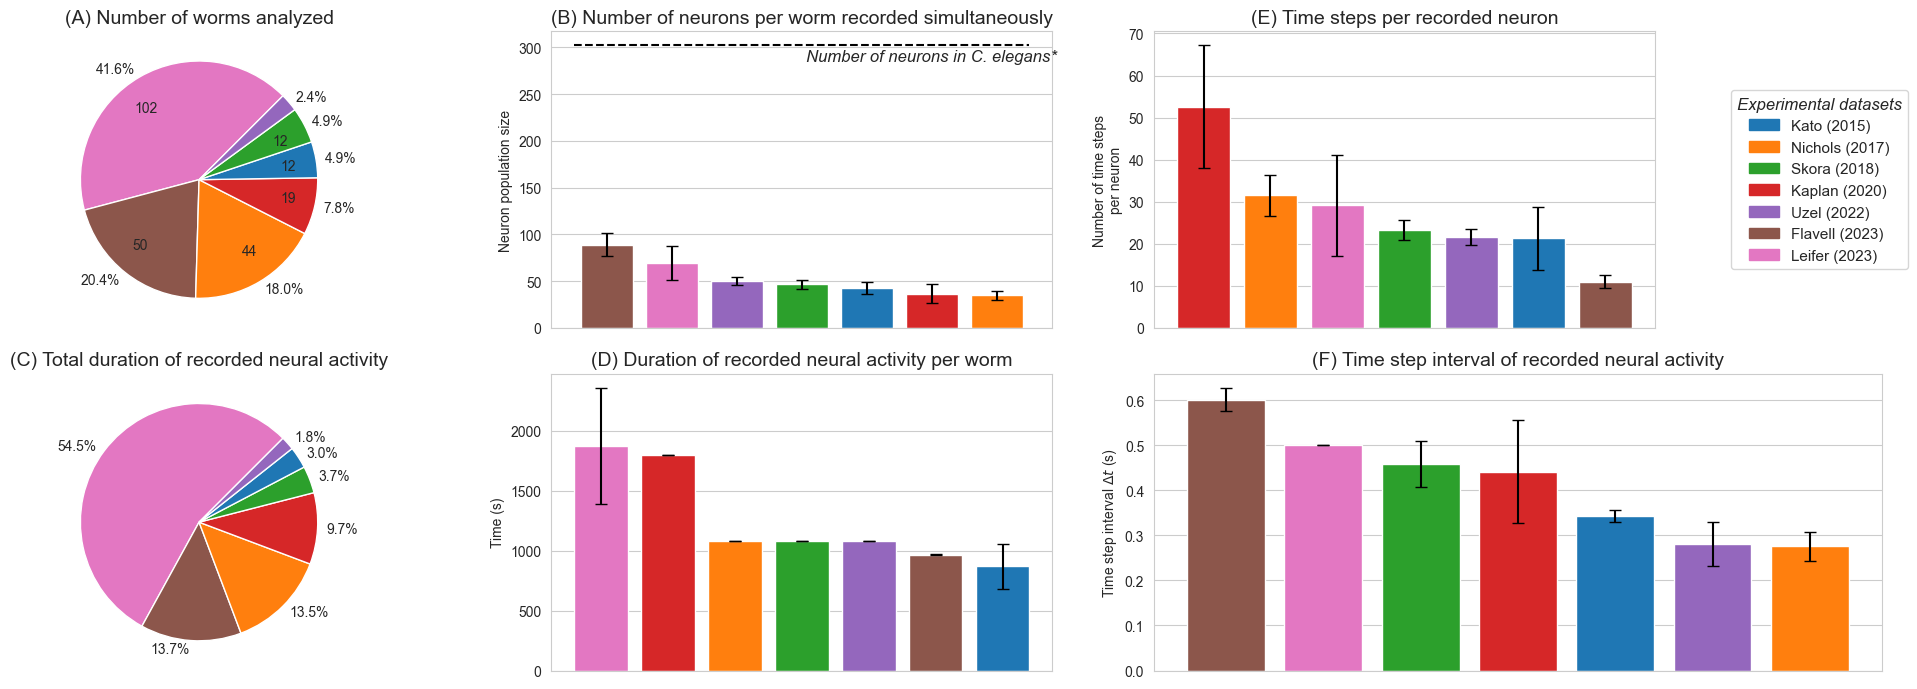

In [29]:
fig1_path_dict = {
    'train_dataset_info': '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR/NTS_LINEAR/exp5/dataset/train_dataset_info.csv',
    'val_dataset_info': '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR/NTS_LINEAR/exp5/dataset/val_dataset_info.csv',
    'analysis_info': '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR/CDS_LINEAR/exp0/analysis/validation_loss_per_dataset.csv'
}

dataset_info = dataset_information(path_dict=fig1_path_dict, legend_code=leg_code)

# Data scaling

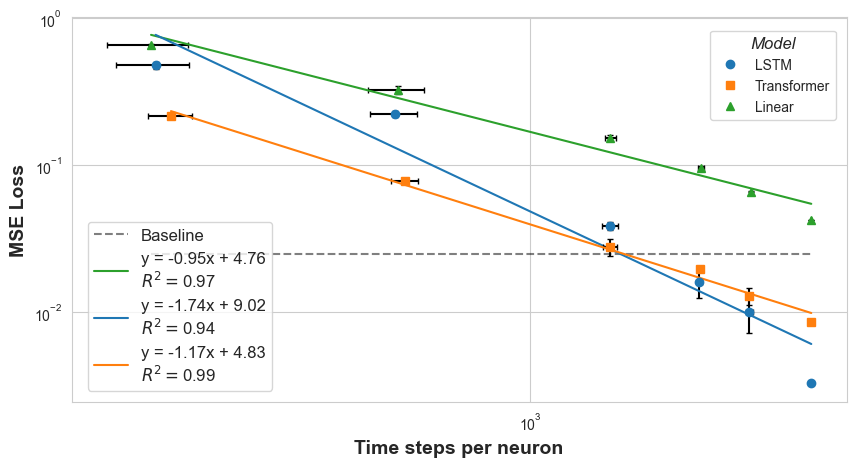

In [28]:
iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR'

nts_experiments = {
    'LSTM': [
        os.path.join(iclr_path, 'NTS_LSTM'),
        os.path.join(iclr_path, 'NTS_LSTM_1'),
        os.path.join(iclr_path, 'NTS_LSTM_2'),
    ],
    'Transformer': [
        os.path.join(iclr_path, 'NTS_TRANSFORMER'),
        os.path.join(iclr_path, 'NTS_TRANSFORMER_1'),
        os.path.join(iclr_path, 'NTS_TRANSFORMER_2'),
    ],
    'Linear': [
        os.path.join(iclr_path, 'NTS_LINEAR'),
        os.path.join(iclr_path, 'NTS_LINEAR_1'),
        os.path.join(iclr_path, 'NTS_LINEAR_2'),
    ]
}

data_results = data_scaling_df(nts_experiments)
data_scaling_plot(data_results, legend_code=leg_code)

# Hidden Scaling

In [4]:
iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR'

hidden_experiments = {
    'LSTM': [
        os.path.join(iclr_path, 'HIDDEN_LSTM_1'),
        os.path.join(iclr_path, 'HIDDEN_LSTM_2'),
        os.path.join(iclr_path, 'HIDDEN_LSTM_3'),
    ],
    'Transformer': [
        os.path.join(iclr_path, 'HIDDEN_TRANSFORMER_1'),
        os.path.join(iclr_path, 'HIDDEN_TRANSFORMER_2'),
        os.path.join(iclr_path, 'HIDDEN_TRANSFORMER_3'),
    ],
    'Linear': [
        os.path.join(iclr_path, 'HIDDEN_LINEAR_1'),
        os.path.join(iclr_path, 'HIDDEN_LINEAR_2'),
        os.path.join(iclr_path, 'HIDDEN_LINEAR_3'),
    ]
}

hidden_results = data_scaling_df(hidden_experiments)

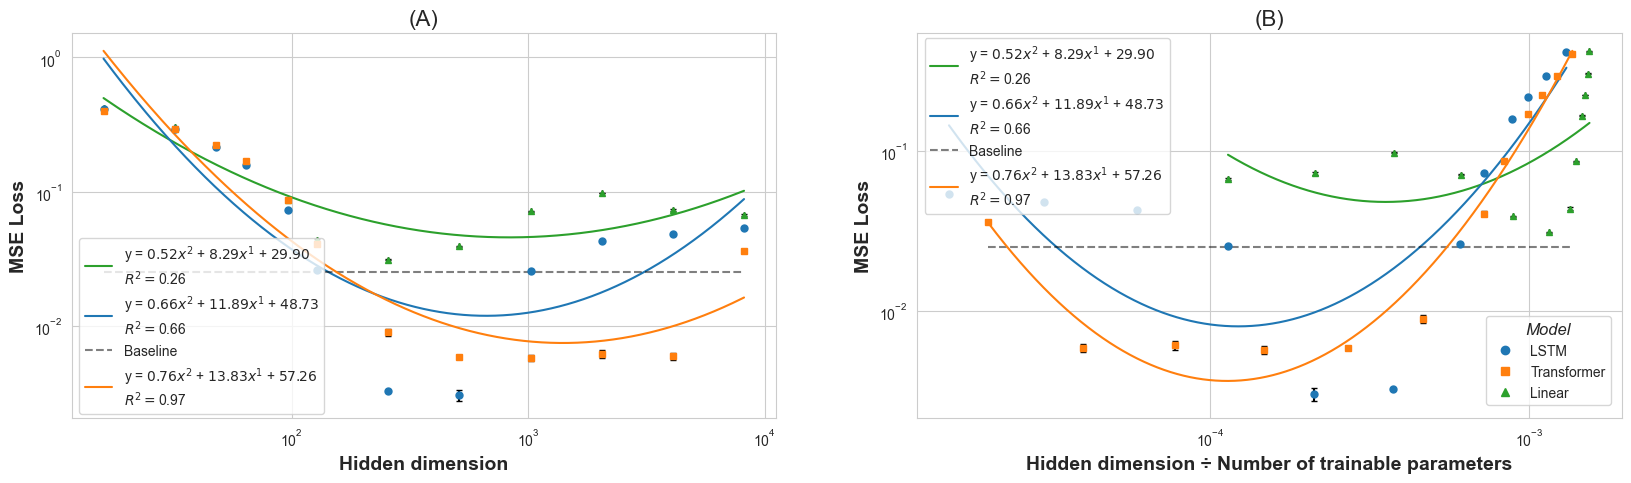

In [22]:
hidden_scaling_plot(hidden_results, legend_code=leg_code, fit_deg=2)

# Data scaling slopes

In [91]:
iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR'

nts_experiments = {
    'LSTM': [
        os.path.join(iclr_path, 'NTS_LSTM'),
        os.path.join(iclr_path, 'NTS_LSTM_1'),
        os.path.join(iclr_path, 'NTS_LSTM_2'),
    ],
    'Transformer': [
        os.path.join(iclr_path, 'NTS_TRANSFORMER'),
        os.path.join(iclr_path, 'NTS_TRANSFORMER_1'),
        os.path.join(iclr_path, 'NTS_TRANSFORMER_2'),
    ],
    'Linear': [
        os.path.join(iclr_path, 'NTS_LINEAR'),
        os.path.join(iclr_path, 'NTS_LINEAR_1'),
        os.path.join(iclr_path, 'NTS_LINEAR_2'),
    ]
}

data_scaling_results = {
        'expID': [],
        'model': [],
        'validation_dataset': [],
        'individual_validation_loss': [],
        'individual_baseline_loss': [],
        'model_hidden_size': [],
        'model_hidden_volume': [],
        'num_time_steps': [],
        'time_steps_volume': [],
        'min_val_loss': [],
        'val_baseline': [],
    }

for model, exp_paths in nts_experiments.items():

    for exp_log_dir in exp_paths:
        
        # Loop over all the experiment files
        for expID in np.sort(os.listdir(exp_log_dir)):

            # Skip if not starts with exp
            if not expID.startswith('exp') or expID.startswith('exp_'):
                continue

            exp_dir = os.path.join(exp_log_dir, expID)

            # Load train metrics
            df = pd.read_csv(os.path.join(exp_dir, 'train', 'train_metrics.csv'))
            df_analysis = pd.read_csv(os.path.join(exp_dir, 'analysis', 'validation_loss_per_dataset.csv'))

            for val_dataset in df_analysis['dataset']:
                data_scaling_results['validation_dataset'].append(val_dataset)
                data_scaling_results['individual_validation_loss'].append(df_analysis[df_analysis['dataset'] == val_dataset]['val_loss'].values[0])
                data_scaling_results['individual_baseline_loss'].append(df_analysis[df_analysis['dataset'] == val_dataset]['val_baseline'].values[0])
                data_scaling_results['expID'].append(expID)
                data_scaling_results['model'].append(experiment_parameter(exp_dir, 'model_type')[0])
                data_scaling_results['model_hidden_size'].append(experiment_parameter(exp_dir, 'hidden_size')[0])
                data_scaling_results['model_hidden_volume'].append(experiment_parameter(exp_dir, 'hidden_volume')[0])
                data_scaling_results['num_time_steps'].append(experiment_parameter(exp_dir, 'num_time_steps')[0])
                data_scaling_results['time_steps_volume'].append(experiment_parameter(exp_dir, 'time_steps_volume')[0])
                data_scaling_results['min_val_loss'].append(df['val_loss'].min())
                data_scaling_results['val_baseline'].append(df['val_baseline'].mean())

data_scaling_results = pd.DataFrame(data_scaling_results)

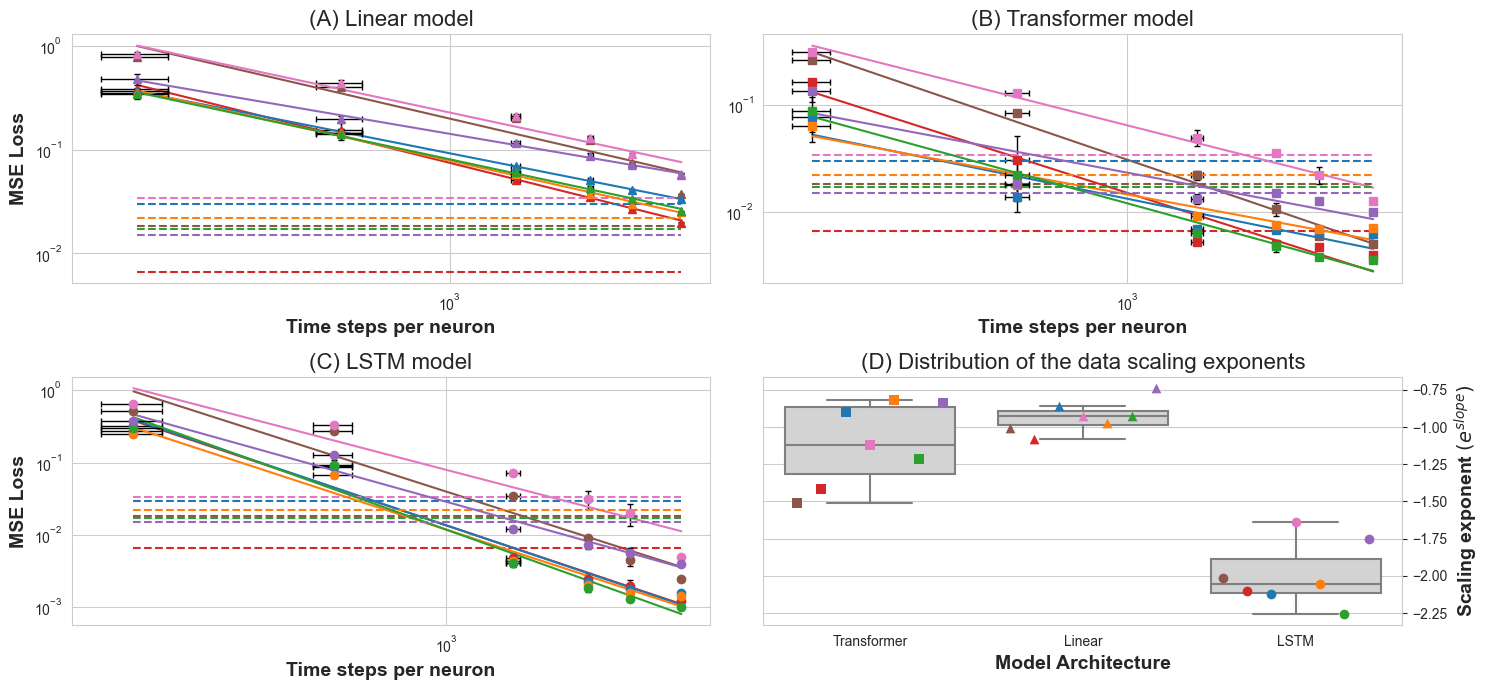

In [96]:
df = data_scaling_results.groupby(['model', 'validation_dataset', 'expID']).agg(['mean', 'std'])

original_ds_color_code = leg_code['original_ds_color_code']
model_marker_code = leg_code['model_marker_code']
model_labels = leg_code['model_labels']
inverse_model_labels = {u:v for v,u in model_labels.items()}

fig, ax = plt.subplots(2, 2, figsize=(15, 7))

slopes = {
    'model': [],
    'validation_dataset': [],
    'slope': [],
}

pd.DataFrame(columns=['model', 'dataset', 'slope', 'intercept', 'r_value'])

for subplot_idx, model_name in enumerate(df.index.get_level_values('model').unique().to_list()):
    
    for val_dataset in df.index.get_level_values('validation_dataset').unique().to_list():

        if subplot_idx > 1:
            col = 1
        else:
            col = 0
        
        row = subplot_idx % 2

        if row == 1 and col == 1:
            continue

        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')

        x = df.loc[model_name].loc[val_dataset]['time_steps_volume']['mean'].values
        x_err = df.loc[model_name].loc[val_dataset]['time_steps_volume']['std'].values

        y = df.loc[model_name].loc[val_dataset]['individual_validation_loss']['mean'].values
        y_err = df.loc[model_name].loc[val_dataset]['individual_validation_loss']['std'].values

        baseline = df.loc[model_name].loc[val_dataset]['individual_baseline_loss']['mean'].values

        slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(x), np.log(y))
        fit_label = 'y = {:.2e}x + {:.2e} ('.format(slope, intercept)+r'$R^2=$'+'{})'.format(round(r_value**2, 3))


        ax[row, col].errorbar(x=x, y=y, xerr=x_err, yerr=y_err, color=original_ds_color_code[val_dataset],
                              fmt=model_marker_code[model_labels[model_name]], ecolor='black', capsize=2, elinewidth=1)
        ax[row,col].plot(x, baseline, linestyle='--', color=original_ds_color_code[val_dataset])
        ax[row,col].plot(x, np.exp(intercept + slope * np.log(x)), linestyle='-', color=original_ds_color_code[val_dataset])

        slopes['model'].append(model_name)
        slopes['validation_dataset'].append(val_dataset)
        slopes['slope'].append(slope)

slopes = pd.DataFrame(slopes)

# Set axis labels and title
ax[1,0].set_xlabel('Time steps per neuron', fontdict={'fontsize': 14, 'fontweight':'bold'})
ax[0,1].set_xlabel('Time steps per neuron', fontdict={'fontsize': 14, 'fontweight':'bold'})
ax[0,0].set_xlabel('Time steps per neuron', fontdict={'fontsize': 14, 'fontweight':'bold'})
ax[0,0].set_ylabel('MSE Loss', fontdict={'fontsize': 14, 'fontweight':'bold'})
ax[1,0].set_ylabel('MSE Loss', fontdict={'fontsize': 14, 'fontweight':'bold'})

ax[0,0].set_title('(A) Linear model', fontdict={'fontsize': 16})
ax[0,1].set_title('(B) Transformer model', fontdict={'fontsize': 16})
ax[1,0].set_title('(C) LSTM model', fontdict={'fontsize': 16})

# Use seaborn's boxplot function with model on the x-axis
sns.boxplot(data=slopes, x='model', y='slope', ax=ax[1,1], color='lightgrey', showfliers=False,
            order=['NeuralTransformer', 'LinearNN', 'NetworkLSTM'])  # You might want to set a neutral color for the boxplot
ax[1,1].set_xticklabels(['Transformer', 'Linear', 'LSTM'])

for model, marker in model_marker_code.items():
    model_data = slopes[slopes['model'] == inverse_model_labels[model]]
    sns.stripplot(data=model_data, x='model', y='slope', hue='validation_dataset', ax=ax[1,1], palette=original_ds_color_code, size=7,
                    order=['NeuralTransformer', 'LinearNN', 'NetworkLSTM'], dodge=True, marker=marker, legend=False)

ax[1,1].set_title('(D) Distribution of the data scaling exponents', fontsize=16)
ax[1,1].set_ylabel(r'Scaling exponent $(e^{slope})$', fontsize=14, fontweight='bold')
ax[1,1].set_xlabel('Model Architecture', fontsize=14, fontweight='bold')

ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()

plt.tight_layout()
plt.show()

In [97]:
iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR'

nts_experiments = {
    'LSTM': [
        os.path.join(iclr_path, 'CDS_LSTM'),
        os.path.join(iclr_path, 'CDS_LSTM_1'),
        os.path.join(iclr_path, 'CDS_LSTM_2'),
    ],
    'Transformer': [
        os.path.join(iclr_path, 'CDS_TRANSFORMER'),
        os.path.join(iclr_path, 'CDS_TRANSFORMER_1'),
        os.path.join(iclr_path, 'CDS_TRANSFORMER_2'),
    ],
    'Linear': [
        os.path.join(iclr_path, 'CDS_LINEAR'),
        os.path.join(iclr_path, 'CDS_LINEAR_1'),
        os.path.join(iclr_path, 'CDS_LINEAR_2'),
    ]
}

data_scaling_results = {
        'expID': [],
        'model': [],
        'train_dataset': [],
        'validation_dataset': [],
        'individual_validation_loss': [],
        'individual_baseline_loss': [],
        'model_hidden_size': [],
        'model_hidden_volume': [],
        'num_time_steps': [],
        'time_steps_volume': [],
        'min_val_loss': [],
        'val_baseline': [],
    }

for model, exp_paths in nts_experiments.items():

    for exp_log_dir in exp_paths:
        
        # Loop over all the experiment files
        for expID in np.sort(os.listdir(exp_log_dir)):

            # Skip if not starts with exp
            if not expID.startswith('exp') or expID.startswith('exp_'):
                continue

            exp_dir = os.path.join(exp_log_dir, expID)

            # Load train metrics
            df = pd.read_csv(os.path.join(exp_dir, 'train', 'train_metrics.csv'))
            df_analysis = pd.read_csv(os.path.join(exp_dir, 'analysis', 'validation_loss_per_dataset.csv'))
            dt_train_dataset = pd.read_csv(os.path.join(exp_dir, 'dataset', 'train_dataset_info.csv'))

            for val_dataset in df_analysis['dataset']:
                data_scaling_results['train_dataset'].append(dt_train_dataset['dataset'].values[0])
                data_scaling_results['validation_dataset'].append(val_dataset)
                data_scaling_results['individual_validation_loss'].append(df_analysis[df_analysis['dataset'] == val_dataset]['val_loss'].values[0])
                data_scaling_results['individual_baseline_loss'].append(df_analysis[df_analysis['dataset'] == val_dataset]['val_baseline'].values[0])
                data_scaling_results['expID'].append(expID)
                data_scaling_results['model'].append(experiment_parameter(exp_dir, 'model_type')[0])
                data_scaling_results['model_hidden_size'].append(experiment_parameter(exp_dir, 'hidden_size')[0])
                data_scaling_results['model_hidden_volume'].append(experiment_parameter(exp_dir, 'hidden_volume')[0])
                data_scaling_results['num_time_steps'].append(experiment_parameter(exp_dir, 'num_time_steps')[0])
                data_scaling_results['time_steps_volume'].append(experiment_parameter(exp_dir, 'time_steps_volume')[0])
                data_scaling_results['min_val_loss'].append(df['val_loss'].min())
                data_scaling_results['val_baseline'].append(df['val_baseline'].mean())

data_scaling_results = pd.DataFrame(data_scaling_results)

In [100]:
df = data_scaling_results.groupby(['model', 'train_dataset', 'validation_dataset', 'expID']).agg(['mean', 'std'])

In [101]:
df

individual_validation_loss  \
                                                                               mean   
model             train_dataset validation_dataset expID                              
LinearNN          Flavell2023   Flavell2023        exp5                    0.322184   
                                Kaplan2020         exp5                    0.586463   
                                Kato2015           exp5                    0.644494   
                                Leifer2023         exp5                    0.456647   
                                Nichols2017        exp5                    0.393312   
...                                                                             ...   
NeuralTransformer Uzel2022      Kato2015           exp3                    0.462110   
                                Leifer2023         exp3                    1.030243   
                                Nichols2017        exp3                    0.346101   
                                Skora2018          exp3                    0.466287   
                                Uzel2022           exp3                    0.143044   

                                                                    \
                                                               std   
model             train_dataset validation_dataset expID             
LinearNN          Flavell2023   Flavell2023        exp5   0.015171   
                                Kaplan2020         exp5   0.047605   
                                Kato2015           exp5   0.053062   
                                Leifer2023         exp5   0.004111   
                                Nichols2017        exp5   0.065528   
...                                                            ...   
NeuralTransformer Uzel2022      Kato2015           exp3   0.004142   
                                Leifer2023         exp3   0.014942   
                                Nichols2017        exp3   0.011375   
                                Skora2018          exp3   0.001191   
                                Uzel2022           exp3   0.014462   

                                                         individual_baseline_loss  \
                                                                             mean   
model             train_dataset validation_dataset expID                            
LinearNN          Flavell2023   Flavell2023        exp5                  0.018293   
                                Kaplan2020         exp5                  0.006685   
                                Kato2015           exp5                  0.029884   
                                Leifer2023         exp5                  0.033943   
                                Nichols2017        exp5                  0.022199   
...                                                                           ...   
NeuralTransformer Uzel2022      Kato2015           exp3                  0.029884   
                                Leifer2023         exp3                  0.033943   
                                Nichols2017        exp3                  0.022199   
                                Skora2018          exp3                  0.017295   
                                Uzel2022           exp3                  0.015068   

                                                               \
                                                          std   
model             train_dataset validation_dataset expID        
LinearNN          Flavell2023   Flavell2023        exp5   0.0   
                                Kaplan2020         exp5   0.0   
                                Kato2015           exp5   0.0   
                                Leifer2023         exp5   0.0   
                                Nichols2017        exp5   0.0   
...                                                       ...   
NeuralTransformer Uzel2022      Kato2015           exp3   0.0   
                

In [102]:
for subplot_idx, model_name in enumerate(df.index.get_level_values('model').unique().to_list()):
    
    for train_dataset in df.index.get_level_values('train_dataset').unique().to_list():

        for val_dataset in df.index.get_level_values('validation_dataset').unique().to_list():

            print(model, train_dataset, val_dataset)

Linear Flavell2023 Flavell2023
Linear Flavell2023 Kaplan2020
Linear Flavell2023 Kato2015
Linear Flavell2023 Leifer2023
Linear Flavell2023 Nichols2017
Linear Flavell2023 Skora2018
Linear Flavell2023 Uzel2022
Linear Kaplan2020 Flavell2023
Linear Kaplan2020 Kaplan2020
Linear Kaplan2020 Kato2015
Linear Kaplan2020 Leifer2023
Linear Kaplan2020 Nichols2017
Linear Kaplan2020 Skora2018
Linear Kaplan2020 Uzel2022
Linear Kato2015 Flavell2023
Linear Kato2015 Kaplan2020
Linear Kato2015 Kato2015
Linear Kato2015 Leifer2023
Linear Kato2015 Nichols2017
Linear Kato2015 Skora2018
Linear Kato2015 Uzel2022
Linear Leifer2023 Flavell2023
Linear Leifer2023 Kaplan2020
Linear Leifer2023 Kato2015
Linear Leifer2023 Leifer2023
Linear Leifer2023 Nichols2017
Linear Leifer2023 Skora2018
Linear Leifer2023 Uzel2022
Linear Nichols2017 Flavell2023
Linear Nichols2017 Kaplan2020
Linear Nichols2017 Kato2015
Linear Nichols2017 Leifer2023
Linear Nichols2017 Nichols2017
Linear Nichols2017 Skora2018
Linear Nichols2017 Uzel2022
